In [1]:
import numpy as np
import scipy.io.wavfile as wav
import scipy.fftpack as fftp
import pathlib
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import IPython
DATA = pathlib.Path('../../data').resolve()

In [2]:
p = pathlib.Path('chunk.wav').resolve()
if not p.exists():
    loc = 'aow','art_of_war_01-02_sun_tzu.wav'
    f = DATA.joinpath(*loc).resolve()
    sr, sig = wav.read(str(f))
    st,sp = 25,36
    t1,t2 = st*sr,sp*sr
    wav.write(str(p), int(sr), sig[t1:t2])
else:
    sr, sig = wav.read(str(p))
    Ts = 1.0/sr
IPython.display.Audio(str(p))

In [30]:
sig.shape[0]/sr

11.0

In [7]:
n = sig.shape[0] # length of the signal
k = np.arange(n)
T = n/sr
frq = k/T # two sides frequency range
half = n//2
frq = frq[:half] # one side frequency range

Y0 = fftp.fft(sig) # fft computing and normalization
Y = Y0[:half]

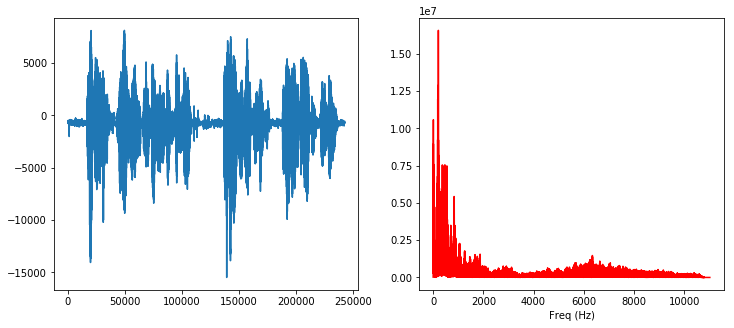

In [3]:
f,a = plt.subplots(1,2,figsize=(12,5))
a[0].plot(sig)
a[1].plot(frq[1:],abs(Y[1:]),'r') # plotting the spectrum
a[1].set_xlabel('Freq (Hz)')
plt.show()

In [ ]:
def lowpass(signal,thresh):
    # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
    fc = 0.1
    # Transition band, as a fraction of the sampling rate (in (0, 0.5)).
    b = 0.08
    N = int((4 // b)+1)
    if not N % 2:
        N+=1
    n = np.arange(N)
    h = np.sinc(2 * fc * (n - (N - 1) / 2)) * np.blackman(n)
    h = h / np.sum(h)
    s = np.convolve(ignal,h)
    
    

In [4]:
#sig_2 = Y
inv = np.int16(np.round(fftp.ifft(Y0).real))
np.allclose(inv,sig)

True

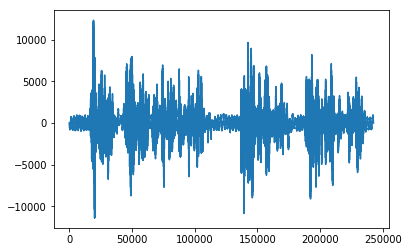

In [5]:
t = np.arange(len(sig))
m_hz = 10
mod = np.sin(2*np.pi*m_hz*t/sr)

S = sig*mod

# (1 + m*np.cos(2*np.pi*fm*t+phi))*A*np.sin(2*np.pi*fc*t)

plt.plot(S)
plt.show()

In [6]:
IPython.display.Audio(data=S,rate=sr)